In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
import string
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize

In [2]:
def clean_data(filename):

    # load data
    file = open(filename, 'rt')
    text = file.read()
    file.close()
    
    # split into words
    tokens = word_tokenize(text)
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    filter1 = [w for w in tokens if not w in stop_words if len(w)>3]
    
    # determine tags
    tags = pos_tag(filter1)
    filter2 = [t for t in tags]

    filter3 = [w for w,t in filter2
              if t == "NN"
              or t == "NNS"
              or t == "NNP"
              or t == "NNPS"
              or t == "FW"]

    # convert to lower case
    filter4 = [w.lower() for w in filter3]

    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    filter5 = [w.translate(table) for w in filter4]

    # remove remaining tokens that are not alphabetic
    filter6 = [word for word in filter5 if word.isalpha()]


    lemmatizer = WordNetLemmatizer()
    filter7 = [lemmatizer.lemmatize(word) for word in filter6]
    
    
    results = [word for word in filter7 
        if word !='project' 
        and word !='gutenbergtm'
        and word !='gutenberg'
        and word !='ebook'
        and word !='chapter'
        and word !='work'
        and word !='nothing'
        and word !='thing']
    
    return results
    
    
    
    

In [3]:
def word_cloud(book):
    clean =  clean_data(book)
    
    unique_string=(" ").join(clean)
    wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

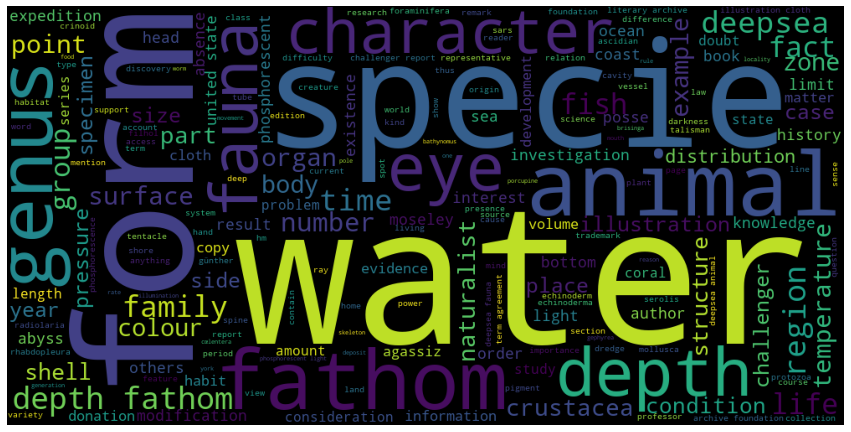

In [4]:
cloud1 = word_cloud('The fauna of the deep sea.txt')